# Poker Hand dataset

Il dataset Poker Hand contiene un insieme di 1 milione di mani di poker simulate, ognuna rappresentata da un vettore di 10 carte distribuite a 10 giocatori in una partita di poker. Il dataset è stato creato con lo scopo di sviluppare algoritmi di classificazione in grado di riconoscere il valore delle mani di poker.

Le variabili presenti nel dataset sono le seguenti:

* s1: Seme della carta 1 (fiori, quadri, cuori, picche).

* c1: Valore della carta 1 (2-10, J, Q, K, A).

* s2: Seme della carta 2 (fiori, quadri, cuori, picche).

* c2: Valore della carta 2 (2-10, J, Q, K, A).

* s3: Seme della carta 3 (fiori, quadri, cuori, picche).

* c3: Valore della carta 3 (2-10, J, Q, K, A).

* s4: Seme della carta 4 (fiori, quadri, cuori, picche).

* c4: Valore della carta 4 (2-10, J, Q, K, A).

* s5: Seme della carta 5 (fiori, quadri, cuori, picche).

* c5: Valore della carta 5 (2-10, J, Q, K, A).

* class : La classe della mano di poker è divisa in 10 categorie, dall'asso al dieci, dalle coppie al poker e al full house.

Il dataset è stato diviso in due parti: un set di addestramento (n = 250.000) e un set di test (n = 750.000). Il set di addestramento è utilizzato per addestrare il modello di classificazione, mentre il set di test è utilizzato per valutare le prestazioni del modello.

Il dataset Poker Hand è stato utilizzato per sviluppare algoritmi di classificazione in grado di riconoscere il valore delle mani di poker, ma può essere utilizzato anche per esplorare la relazione tra le carte distribuite e il valore della mano di poker. Il dataset è stato reso disponibile dall'archivio online del UCI Machine Learning Repository.

In [1]:
import pandas as pd

col_name = ["s1","c1","s2","c2","s3","c3","s4","c4","s5","c5","class"]
dataset = pd.read_csv("C:\\Users\\andrea\\Desktop\\Progetto FAD\\poker-hand-training-true.data", names = col_name)
test_set = pd.read_csv("C:\\Users\\andrea\\Desktop\\Progetto FAD\\poker-hand-testing.data", names = col_name)

#test_set = pd.read_csv("C:\\Users\\andrea\\Desktop\\Progetto FAD\\poker-hand-training-true.data", names = col_name)
#data_set = pd.read_csv("C:\\Users\\andrea\\Desktop\\Progetto FAD\\poker-hand-testing.data", names = col_name)

#test_set = test_set.sample(n=1000)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   s1      25010 non-null  int64
 1   c1      25010 non-null  int64
 2   s2      25010 non-null  int64
 3   c2      25010 non-null  int64
 4   s3      25010 non-null  int64
 5   c3      25010 non-null  int64
 6   s4      25010 non-null  int64
 7   c4      25010 non-null  int64
 8   s5      25010 non-null  int64
 9   c5      25010 non-null  int64
 10  class   25010 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


Utilizzando il  metodo .info() vediamo le informazioni su un DataFrame inclusi l'indice dtype, le colonne, i valori non nulli e l'utilizzo della memoria. Viene effettuato un ulteriore controllo per verificare la presenza di eventuali valori NaN. <br>
Come si può notare non ci sono valori NaN e dunque non è necessario effettuare ulteriori operazioni.

Di seguito viene controllato il corretto caricamento del dataset stampando i primi 5 record.

In [2]:
dataset.head()

,s1,c1,s2,c2,s3,c3,s4,c4,s5,c5,class
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [3]:
dataset.isnull().sum().sum()

0

Per ogni features verranno calcolati i descrittori statistici più  significativi al fine di individuare eventuali valori mancanti o anomali.

In [4]:
stats = dataset.describe().apply(lambda s: s.apply('{0:.2f}'.format))
stats


,s1,c1,s2,c2,s3,c3,s4,c4,s5,c5,class
count,25010.00,25010.00,25010.00,25010.00,25010.00,25010.00,25010.00,25010.00,25010.00,25010.00,25010.00
mean,2.51,7.00,2.50,7.01,2.51,7.01,2.50,6.94,2.50,6.96,0.62
std,1.12,3.75,1.12,3.77,1.12,3.74,1.12,3.75,1.12,3.74,0.79
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,2.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,1.00,4.00,0.00
50%,3.00,7.00,2.00,7.00,3.00,7.00,2.00,7.00,3.00,7.00,1.00
75%,4.00,10.00,4.00,10.00,4.00,10.00,3.00,10.00,3.00,10.00,1.00
max,4.00,13.00,4.00,13.00,4.00,13.00,4.00,13.00,4.00,13.00,9.00


Per analizzari i risultati ottenuti verranno plottati i descrittori per ogni features, cosi da avere un'idea visiva della distribuzione

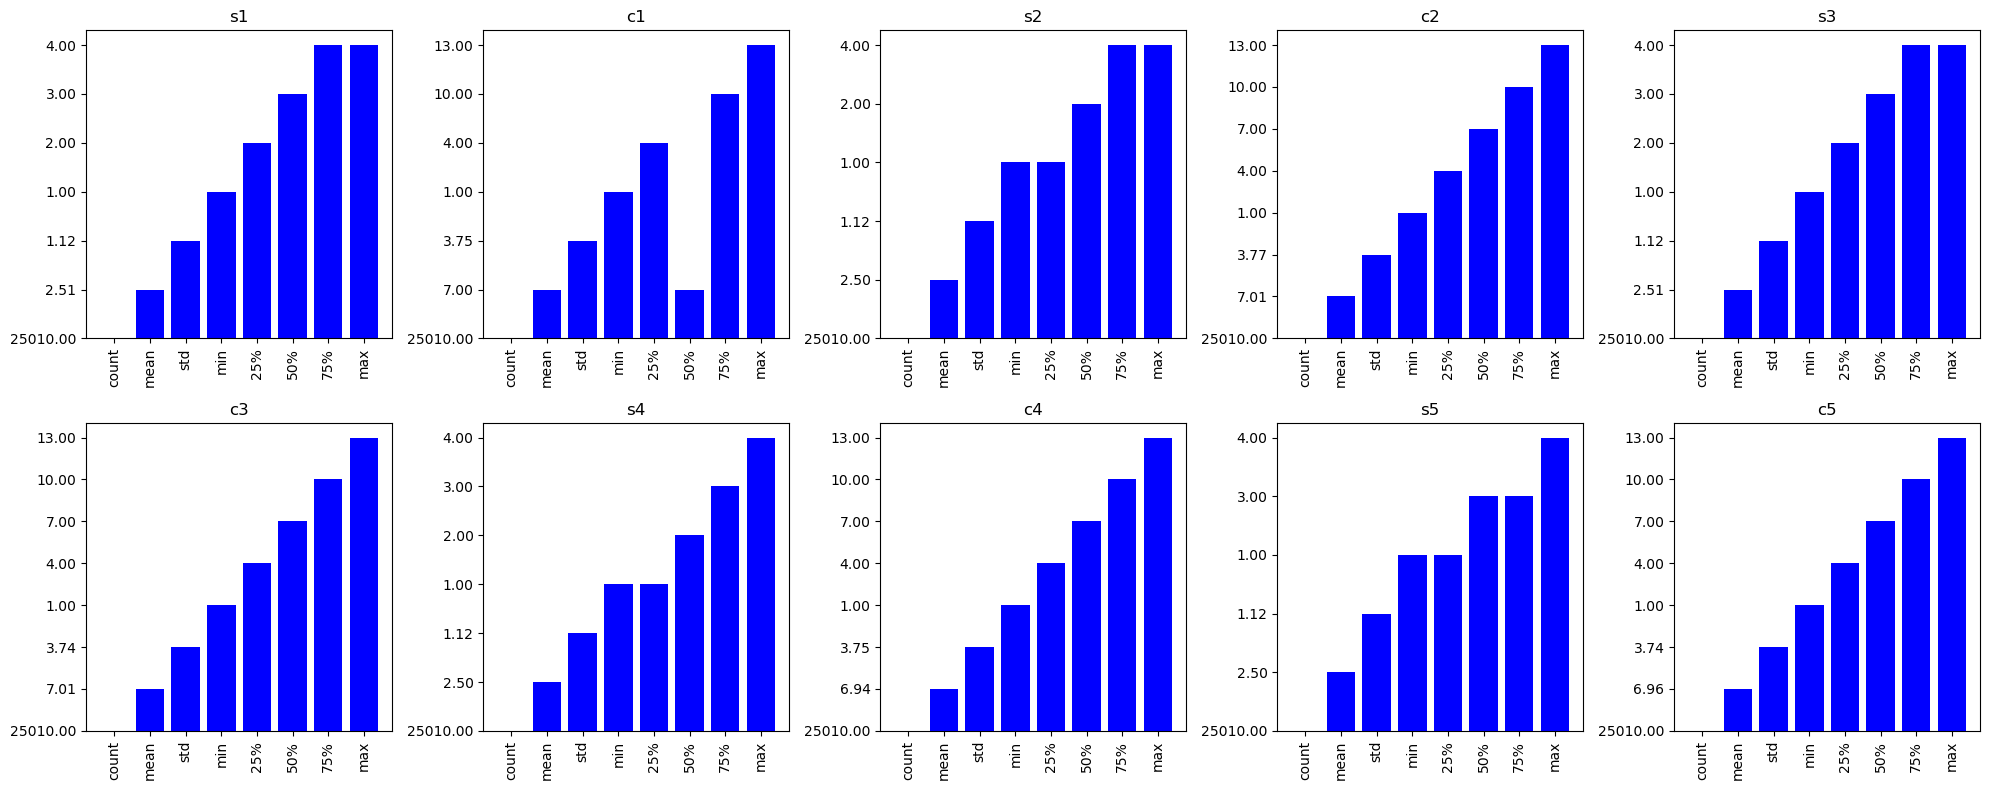

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i in range(10):
    axs[i//5, i%5].bar(stats.index.values, stats[stats.columns[i]], color='b')
    axs[i//5, i%5].set_title(stats.columns[i])
    axs[i//5, i%5].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Analizzando i risultati, non sembra esserci alcun valore mancante nel dataset. I descrittori statistici evidenziano l'assenza di valori anomali. Tutte le feature (c1,c2,c3,c4,c5) che indicano il valore della carta hanno un valore massimo di 13, che è, di fatti, il valore massimo possibile in un mazzo di carte. Esse hanno anche un valore minimo di 1, che è il minimo valore possibile in un mazzo di carte. 
Allo stesso modo le features di tipo seme (s1,s2,s3,s4,s5) hanno un valore massimo di 4, coerente con quanto detto prima.
Tutte le features hanno un count uguale che è pari al numero totale di esempi.

Analizziamo adesso la distrubuzione delle classi , andando a contare il numero di occorrenze per ogni classe (0-9).<br>
Dopodichè andiamo a plottare i risultati analizzando la distrubuzione delle classi. 

Nothing in hand : 12493
One pair : 10599
Two pairs : 1206
Three of a kind : 513
Straight : 93
Flush : 54
Full house : 36
Four of a kind : 6
Straight flush : 5
Royal flush : 5


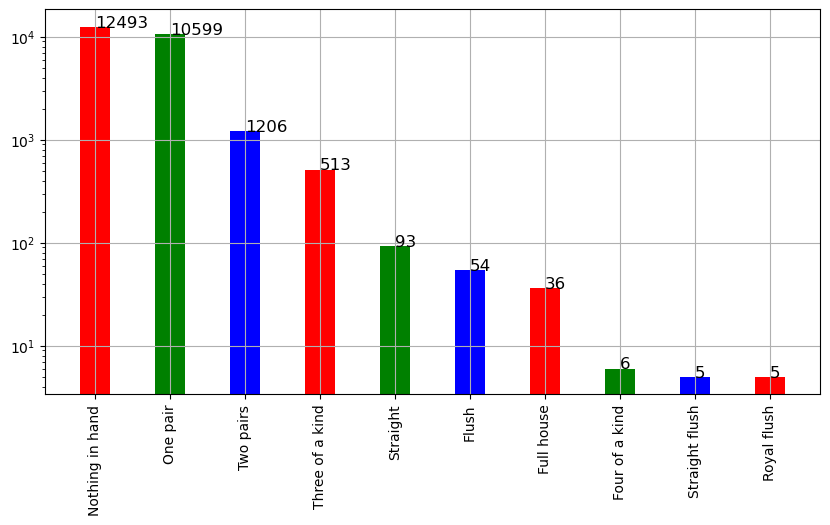

In [6]:

hand_name = {
    0: 'Nothing in hand',
    1: 'One pair',
    2: 'Two pairs',
    3: 'Three of a kind',
    4: 'Straight',
    5: 'Flush',
    6: 'Full house',
    7: 'Four of a kind',
    8: 'Straight flush',
    9: 'Royal flush',
}

target_stat = dataset["class"].value_counts()

for i in range(len(hand_name)):
    print("%s : %d" % (hand_name[i], target_stat[i]))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], fontsize=12)

fig = plt.figure(figsize = (10, 5))

plt.bar(hand_name.values(), target_stat.values ,color=['red', 'green', 'blue'],
        width = 0.4)
plt.xticks(rotation = 90) 
plt.yscale('log')
plt.grid()
        
addlabels(target_stat.index, target_stat.values) 

Come possiamo notare le classi sono altamente sbilanciate. Le classi dominanti sono due :  "Nothing in hand" e "One pair".
Tuttavia questa distrubuzione non è random, poichè essa rappresenta la reale distribuzione del gioco, le classi dominanti coprono quasi il 90% degli esempi.
+ studio probabilita poker

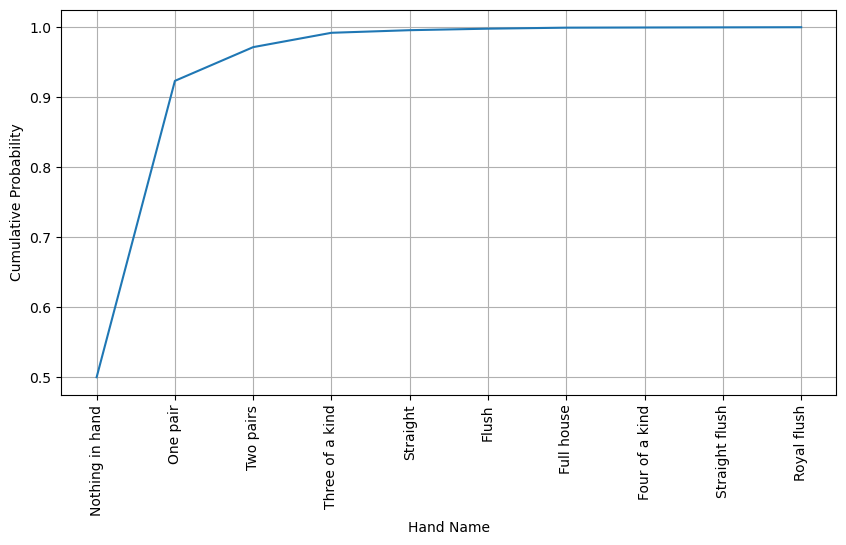

In [7]:
import seaborn as sns
import numpy as np

cdf = dataset['class'].value_counts(normalize=True).sort_index().cumsum()

cdf.plot(kind='line', figsize=(10, 5))

plt.xlabel('Hand Name')
plt.ylabel('Cumulative Probability')
plt.xticks(np.arange(10),['Nothing in hand', 'One pair', 'Two pairs', 'Three of a kind', 'Straight', 'Flush', 'Full house', 'Four of a kind', 'Straight flush', 'Royal flush'],rotation = 90)
plt.grid()

plt.show()

Il plot mostra la cumulative density function (CDF) delle classi del dataset "Poker Hand". La CDF indica la probabilità cumulativa di trovare una mano di poker con un valore uguale o inferiore a quello corrispondente sull'asse x. In questo caso, l'asse x rappresenta le classi di mano di poker, da "Nothing in hand" (classe 0) a "Royal flush" (classe 9). La CDF mostra che la classe più frequente è "One pair" (classe 1), seguita da "Two pairs" (classe 2) e "Three of a kind" (classe 3). La classe meno frequente è "Royal flush" (classe 9), che ha una probabilità cumulativa di circa lo 0,001%.

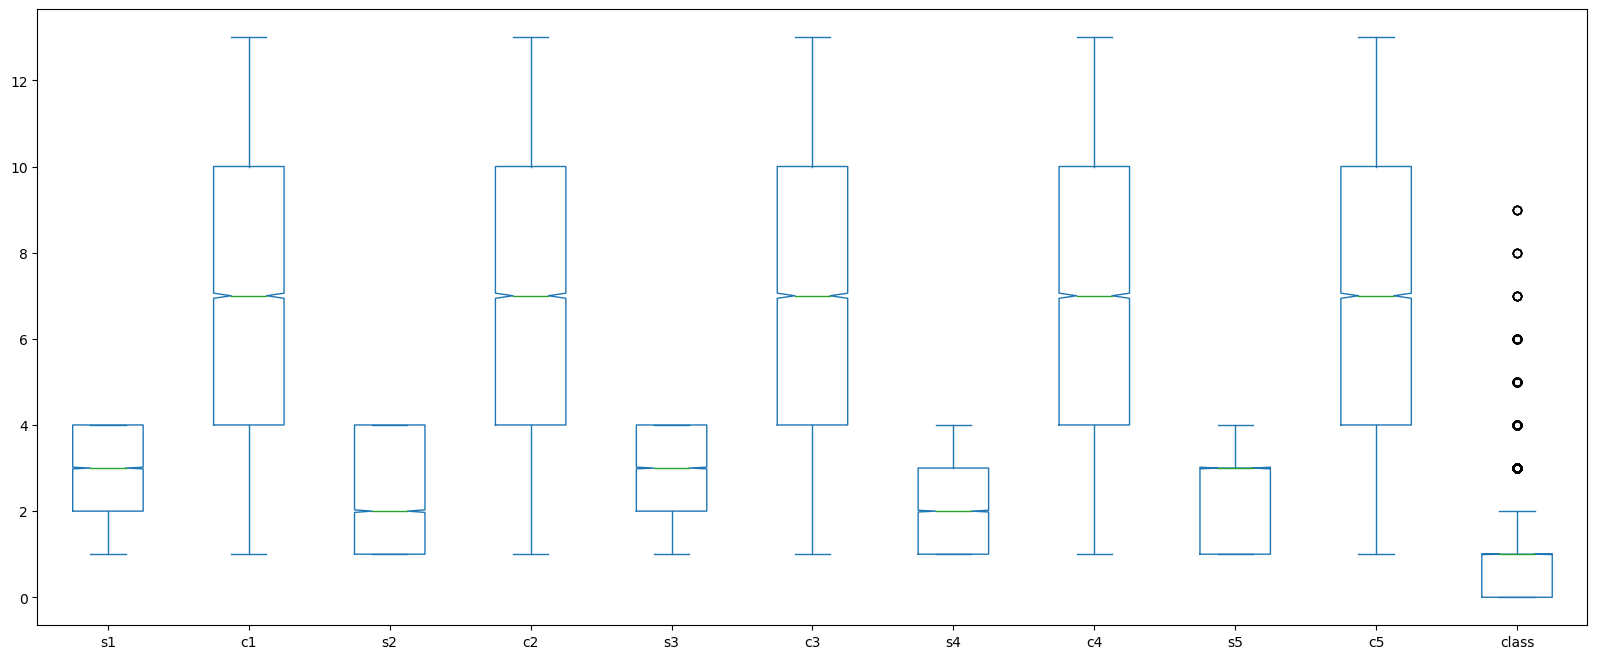

In [8]:
dataset.plot(kind='box', subplots=False, figsize=(20,8), notch=True)

# mostra i plot
plt.show()

I boxplot sopra raffigurati confermano quanto è stato detto fino ad ora. Nel dataset non figurano valori anomali , tutte le features seguono la stessa scala.
Gli unici elementi fuori scala sono le classi in quanto, dalle 3 in poi esse sono molto rare.

# Correlazione tra features

Controlliamo adesso se è presente o meno una correlazione tra le features che compongono il dataset.
Per fare ciò utilizziamo inizialmente la correlazione di pearson, successivamente la confronteremo con quella di spearman

In [9]:
def plotCorrelationMatrix(df, graphWidth):
    
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    #plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    
corr_matrix = dataset.corr("pearson")
corr_matrix

,s1,c1,s2,c2,s3,c3,s4,c4,s5,c5,class
s1,1.000000,-0.010319,-0.021263,0.008237,-0.019618,-0.009947,-0.017301,0.003824,-0.024167,0.006625,0.008244
c1,-0.010319,1.000000,0.004460,-0.010993,-0.000382,-0.026285,0.004061,-0.014439,0.004853,-0.016967,0.002312
s2,-0.021263,0.004460,1.000000,-0.002438,-0.029306,-0.005303,-0.020960,0.012026,-0.011842,0.005782,-0.001135
c2,0.008237,-0.010993,-0.002438,1.000000,-0.005350,-0.024702,-0.008390,-0.012933,0.000640,-0.016383,-0.005191
s3,-0.019618,-0.000382,-0.029306,-0.005350,1.000000,0.017942,-0.012998,0.001874,-0.030305,-0.002022,0.003951
c3,-0.009947,-0.026285,-0.005303,-0.024702,0.017942,1.000000,-0.003191,-0.016323,0.003731,-0.010943,-0.006256
s4,-0.017301,0.004061,-0.020960,-0.008390,-0.012998,-0.003191,1.000000,-0.008695,-0.018200,0.005345,-0.001552
c4,0.003824,-0.014439,0.012026,-0.012933,0.001874,-0.016323,-0.008695,1.000000,0.002810,-0.014681,0.010163
s5,-0.024167,0.004853,-0.011842,0.000640,-0.030305,0.003731,-0.018200,0.002810,1.000000,-0.003157,-0.005616
c5,0.006625,-0.016967,0.005782,-0.016383,-0.002022,-0.010943,0.005345,-0.014681,-0.003157,1.000000,-0.002414


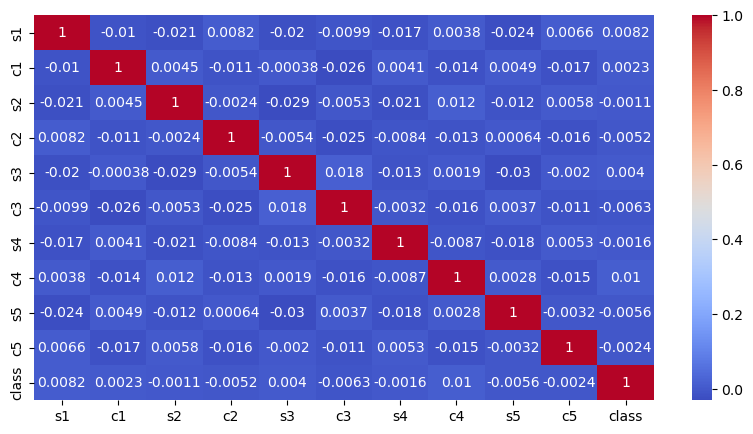

In [10]:
import seaborn as sns

fig = plt.figure(figsize = (10, 5))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

#plotCorrelationMatrix(dataset,10)

In figura l' heatmap della matrice di correlazione, con i valori più elevati in rosso e i valori più bassi in blu. I valori della correlazione sono anche annotati sulla heatmap per una maggiore chiarezza.

Da entrambi i metodi, possiamo vedere che non ci sono correlazioni significative tra le variabili nel dataset Poker hand. Ciò indica che le variabili sono indipendenti l'una dall'altra e che ognuna contribuisce in modo univoco alla predizione della classe della mano di poker.

# Classificazione



Il task di classificazione seguente consiste nel costruire un modello che possa prevedere il valore della mano di poker in base alle carte che sono state distribuite ai giocatori.
Al contrario della soluzione algortimica il task di classificazione potrebbe presentare delle difficoltà per alcuni modelli di machine learning, in quanto per classificare una mano di poker devono essere note tutte e 5 le carte e una singola carta potrebbe riclassificare completamente la mano. Per esempio le prime 4 carte portano ad una mano nulla, mentre con la 5 carta potrebbe diventare una mano forte.
Questo tipo di problema potrebbe mettere in difficolta molti modelli di classificazione.


Per calcolare la qualita del nostro modello andremmo a utilizzare : la F1-score, l'accuratezza e la matrice di confusione

Al fine di allenare e testare i modelli vengono definiti : 
* X_train = features di training
* y_train = etichette di training
* X_test = features di test
* y_test = etichette di test<br>

Tutti i modelli verranno allenati sui dati di training e testati su un test set fisso e uguale per tutti.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score


X_train = dataset.iloc[:,:-1]
X_test = test_set.iloc[:,:-1]
y_train = dataset.iloc[:,-1]
y_test = test_set.iloc[:,-1]

La <b>OneHotEncoder</b> è una tecnica di codifica utilizzata per trasformare le variabili categoriche in variabili numeriche che possono essere utilizzate come input per l'addestramento del modello.
Il vantaggio dell'utilizzo della OneHotEncoder è che permette di gestire correttamente le variabili categoriche, evitando di assegnare accidentalmente un valore numerico ad un'etichetta che non ha un valore numerico intrinseco
    

In [12]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)
X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)


Di seguito viene definita una funziona per plottare le misure di performance dei modelli.

In [13]:
def print_metric(y_test, y_pred):
    import seaborn as sns
    import matplotlib.pyplot as plt    
    
    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    print("Accuratezza : " + str(accuracy_score(y_test, y_pred)))
   
    print("F1-SCORE : " + str(f1_score(y_test, y_pred, average = "weighted")))
    #class_report = classification_report(y_test, y_pred)
    #print(class_report)
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    #ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

# Random forest

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 150 , 200 ,500],
    'max_depth': [2,3,4,5,30,40,50],
    'min_samples_split': [2],
    'min_samples_leaf': [10],
    'max_features': ['sqrt']
}
rf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1,verbose=10)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Migliori parametri: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}
Accuratezza : 0.641764
F1-SCORE : 0.5795264713109172


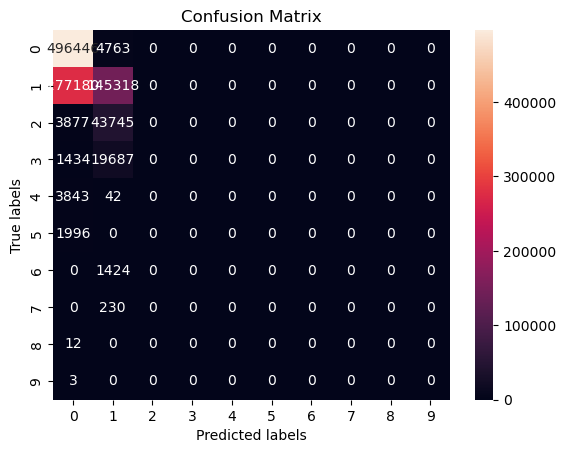

In [17]:
rf.fit(X_train, y_train)

print("Migliori parametri:", rf.best_params_)

y_pred = rf.predict(X_test)
print_metric(y_test, y_pred)

Come possiamo notare il modello ha predetto correttamente buona parte le istanze appartenenti alla classe 1 (Coppia) e alla classe 2 (Doppia Coppia), ma ha faticato ad identificare correttamente le istanze delle classi 3 (Tris), 4 (Scala) e 5 (Full House), che sono state classificate erroneamente come appartenenti alla classe 1 o alla classe 2. Inoltre, il modello non è stato in grado di predire correttamente alcuna istanza appartenente alle classi 6 (Colore), 7 (Scala Colore), 8 (Poker) e 9 (Scala Reale).

Analizzando gli errori notiamo come le uniche classi che dipendono dal valore delle features seme sono :
* Colore (Flush): una mano di cinque carte dello stesso seme.
* Scala Colore (Straight Flush): una mano di cinque carte dello stesso seme in sequenza.
* Scala Reale (Royal Flush): la scala colore più alta possibile, composta dalle carte 10, J, Q, K e A dello stesso seme.

Eliminare la feature "seme" dal dataset potrebbe essere una scelta ragionevole dato che il modello non è in grado di utilizzarla efficacemente per distinguere le 3 mani di poker menzionate. Dunque questa mossa diminuisce la precisione di classificazione delle mani di poker come colore, scala colore e scala reale ma potrebbe aumentare la precisione di classificazione per altre combinazioni di carte che dipendono solo dal valore delle carte.


Di seguito andremo a eliminare tutte le features seme dal training e dal test set e a riallenare il random forest                    

In [16]:
dataset_mod = dataset.drop(columns=['s1','s2','s3','s4','s5'])
test_set_mod = test_set.drop(columns=['s1','s2','s3','s4','s5'])

X_train_mod = dataset_mod.iloc[:,:-1]
X_test_mod = test_set_mod.iloc[:,:-1]
y_train_mod = dataset_mod.iloc[:,-1]
y_test_mod = test_set_mod.iloc[:,-1]

enc = OneHotEncoder(sparse_output=False)
X_train_mod = enc.fit_transform(X_train_mod)
X_test_mod = enc.transform(X_test_mod)

param_grid = {
    'n_estimators': [2000,3000,5000,10000],
    'max_depth': [2,3,4,5,50,100,80],
    'min_samples_split': [2],
    'min_samples_leaf': [10],
    'max_features': ['sqrt']
}
rf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1,verbose=10)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Migliori parametri: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 10000}
Accuratezza : 0.780189
F1-SCORE : 0.7416351747654384


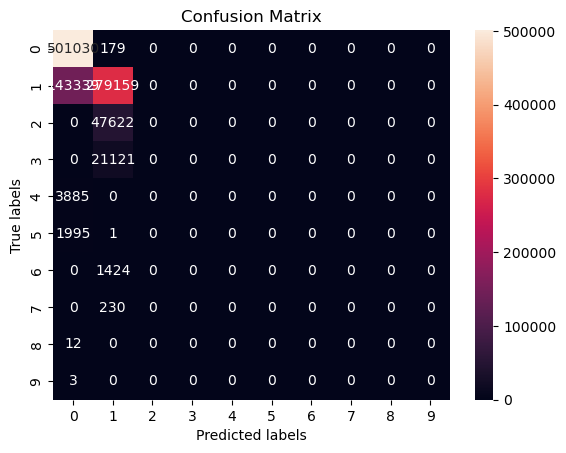

In [17]:
rf.fit(X_train_mod, y_train_mod)

print("Migliori parametri:", rf.best_params_)

y_pred = rf.predict(X_test_mod)

print_metric(y_test_mod, y_pred)

Eliminando le features di tipo seme il modello ha un incremento di accuratezza del circa <b>10%</b> ottenendo un risultato paeri a <b>78%</b>. <br>
Il nuovo modello oltre ad essere più veloce e piu accurato, utilizza anche meno features.


### Oversampling
Di seguito verrà applicato una tecnica di oversampling per cercare di ottenere migliori prestazioni cercando di aumentare il numero di campioni delle classi sottorappresentate, in modo da bilanciare il dataset.
Inoltre verra impostate una <b>max_depth= 5</b> e un <b>n_samples = 50000 </b>


Accuratezza : 0.501209
F1-SCORE : 0.33572863468378733


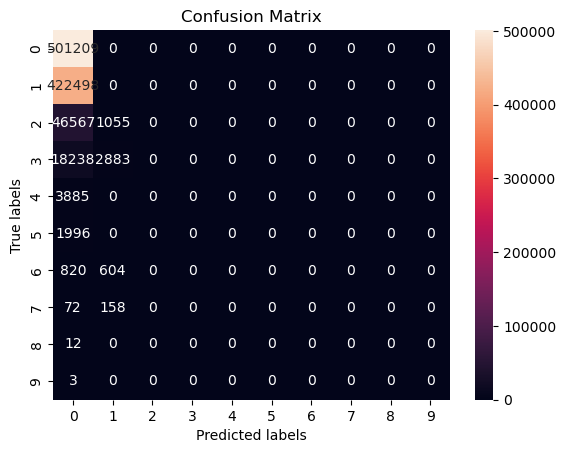

In [15]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

dataset_mod = dataset.drop(columns=['s1','s2','s3','s4','s5'])
test_set_mod = test_set.drop(columns=['s1','s2','s3','s4','s5'])

X_train_mod = dataset_mod.iloc[:,:-1]
X_test_mod = test_set_mod.iloc[:,:-1]
y_train_mod = dataset_mod.iloc[:,-1]
y_test_mod = test_set_mod.iloc[:,-1]

#oversampler = RandomOverSampler(sampling_strategy = "minority")
#X_train_mod, y_train_mod = oversampler.fit_resample(X_train_mod, y_train_mod)

enc = OneHotEncoder(sparse_output=False)
X_train_mod = enc.fit_transform(X_train_mod)
X_test_mod = enc.transform(X_test_mod)

rf = RandomForestClassifier(max_depth= 5, max_features= 'sqrt', min_samples_leaf= 10, min_samples_split= 2, n_estimators= 50000,random_state=42)

rf.fit(X_train_mod, y_train_mod)

y_pred = rf.predict(X_test_mod)

print_metric(y_test_mod, y_pred)

Come è possibile notare l'approccio tramite oversampling non porta a nessuna miglioria delle prestazioni.
Notiamo anche che abbassando la massima profondità degli alberi l'accuratezza del modello non va oltre il 50%.

# Decision tree

Migliori parametri: {'criterion': 'entropy', 'max_depth': None, 'max_features': 17, 'min_samples_leaf': 1}
Accuratezza : 0.660538
F1-SCORE : 0.65972341193911


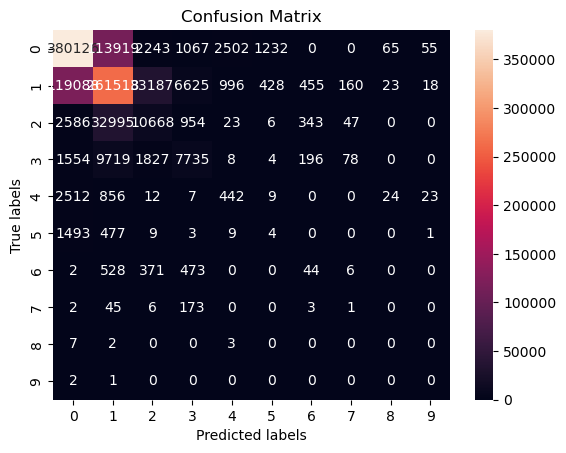

In [34]:
from random import randint
from sklearn import tree
from sklearn.model_selection import GridSearchCV
#0.51
dt = tree.DecisionTreeClassifier()

#oversampler = RandomOverSampler(sampling_strategy='minority')
#X_train_mod, y_train_mod = oversampler.fit_resample(X_train_mod, y_train_mod)


# Definizione dei parametri da testare
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9,10, None],
              "max_features": [randint(1, 20)],
              "min_samples_leaf": [randint(1, 20)],
              "criterion": ["gini", "entropy"]}

# Randomized Search Cross Validation
tree_cv = GridSearchCV(dt, param_grid=param_dist)

# Fit del modello
tree_cv.fit(X_train_mod, y_train_mod)

# Stampa dei migliori parametri trovati
print("Migliori parametri:", tree_cv.best_params_)

y_pred = tree_cv.predict(X_test_mod)

print_metric(y_test_mod, y_pred)


# Approccio gerarchico

Poiche buona parte degli errori di classificazione si ottiene per classi differenti da "nothing in hand" , "one pair" si è deciso di accorpare in un unica classe le restanti classi diverse da "nothing in hand" , "one pair".
In seguito è stata effettuata una classificazione di tipo gerarchico porvando a classificare correttamente le 3 classi.

In [16]:
dataset

,s1,c1,s2,c2,s3,c3,s4,c4,s5,c5,class
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


In [17]:
# crea una nuova colonna "Class" che unisce tutte le classi tranne "Nothing in hand" e "one Pair"
dataset["class"] = dataset["class"].apply(lambda x: 3 if x not in [0,1] else x)
test_set["class"] = test_set["class"].apply(lambda x: 3 if x not in [0,1] else x)
dataset.head()

,s1,c1,s2,c2,s3,c3,s4,c4,s5,c5,class
0,1,10,1,11,1,13,1,12,1,1,3
1,2,11,2,13,2,10,2,12,2,1,3
2,3,12,3,11,3,13,3,10,3,1,3
3,4,10,4,11,4,1,4,13,4,12,3
4,4,1,4,13,4,12,4,11,4,10,3


In [18]:
dataset['class'].unique()

array([3, 1, 0], dtype=int64)

In [19]:
from imblearn.over_sampling import RandomOverSampler

X_train_mod = dataset.iloc[:,:-1]
X_test_mod = test_set.iloc[:,:-1]
y_train_mod = dataset.iloc[:,-1]
y_test_mod = test_set.iloc[:,-1]

#oversampler = RandomOverSampler(sampling_strategy='minority')

#X_train_mod, y_train_mod = oversampler.fit_resample(X_train_mod, y_train_mod)


In [20]:
print(y_train_mod.unique())

[3 1 0]


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth= 50, max_features= 'sqrt', min_samples_leaf= 10, min_samples_split= 2, n_estimators= 10000,random_state=42)

Accuratezza : 0.60523
F1-SCORE : 0.5620759954992249


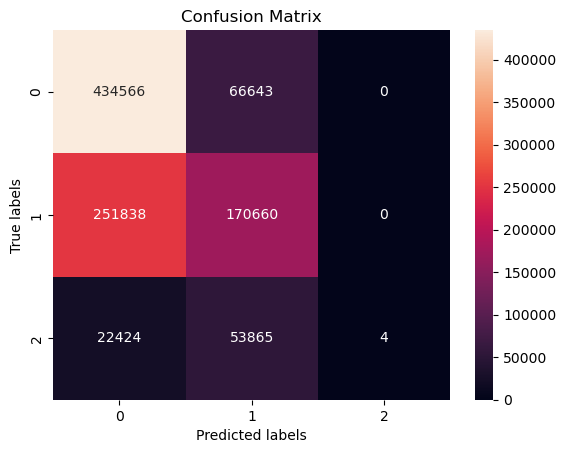

In [22]:
rfc.fit(X_train_mod, y_train_mod)

#print("Migliori parametri:", rf.best_params_)

y_pred = rfc.predict(X_test_mod)

print_metric(y_test_mod, y_pred)

Poichè già in una prima fase non si ottengono miglioramenti rispetto il modello allenato tramite random forest senza accorpare le classi, non ha senso continuare nell'approccio.

# Cluster

L'obbiettivo di questo task è quello di verificare se i dati tendono a separarsi in modo autonomo in gruppi con caratteristiche comuni.
Potrebbe essere interessante esplorare se ci sono dei raggruppamenti di mani di poker simili tra loro, ad esempio, mani che spesso vincono o mani che sono difficili da giocare.
Dai motivi sopra citati (la non correlazione tra features) questo task risulta essere molto complesso da portare a termine con buoni risultati.


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score


#dataset = dataset.drop(columns=['s1','s2','s3','s4','s5'])
#test_set = test_set.drop(columns=['s1','s2','s3','s4','s5'])


X_train = dataset.iloc[:,:-1]
X_test = test_set.iloc[:,:-1]
y_train = dataset.iloc[:,-1]
y_test = test_set.iloc[:,-1]


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
clus_train = X_train

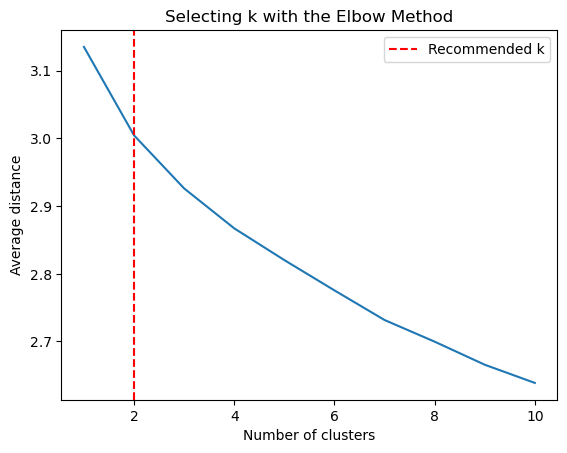

In [25]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

from pylab import rcParams

# k-means cluster analysis for 1-10 clusters due to the 10 possible class outcomes for poker hands                                                       
from scipy.spatial.distance import cdist
clusters=range(1,11)
meandist=[]

# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean distance my taking the sum divided by the shape
for k in clusters:
    model=KMeans(n_clusters=k,n_init='auto')
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))
    / clus_train.shape[0])

curve = np.array(meandist)
curve_deriv1 = np.gradient(curve)
curve_deriv2 = np.gradient(curve_deriv1)
max_idx = np.argmax(curve_deriv2) + 1  # add 1 to shift from 0-based to 1-based index

# Plot the elbow curve with the vertical line
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.axvline(x=max_idx, linestyle='--', color='r', label='Recommended k')
plt.legend()

descrivere k migl

In [82]:
clus_train.shape

(25010, 10)

C:\Users\andrea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


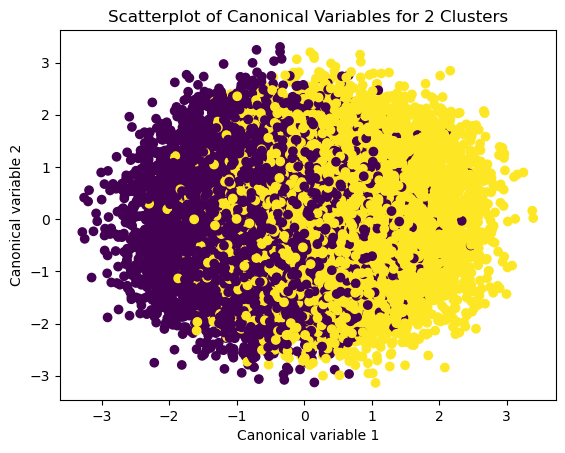

In [56]:
model3=KMeans(n_clusters=2)
model3.fit(clus_train) # has cluster assingments based on using 2 clusters
clusassign=model3.predict(clus_train)

from sklearn.decomposition import PCA 

pca_2 = PCA(2) # return 2 first canonical variables
plot_columns = pca_2.fit_transform(clus_train) # fit CA to the train dataset
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,) # plot 1st canonical variable on x axis, 2nd on y-axis
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show() # close or overlapping clusters idicate correlated variables with low in-class variance but not good separation. 2 cluster might be better.